# Real Time Multi Style Transfer in Pytorch

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Training Example

### Training arguments

In [2]:
dataset_images = "../dataset/train2017/train2017"
styles_dir = "styles"
num_workers = 2
model_dir="new_style"
eval_image_dir = "../bird.jpg"
eval_dir = "temp_eval"

In [ ]:
from trainstylenet import train

In [ ]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [5]:
args = Namespace(content_factor=1,style_factor=1000000,lr=0.0001,eval_dir=None,epochs=2,batch_size=8, dataset_images=dataset_images, styles_dir=styles_dir,num_workers=num_workers,model_dir=model_dir,eval_image_dir=eval_image_dir)

In [ ]:
train(args)

## Alternatively training in command line
```
python multistyle_transfer_net.py --dataset-images {dataset_images} --styles-dir {styles_dir} --num-workers {num_workers} --model-dir {model_dir} --eval-image-dir {eval_image_dir} 
```

## Inference Example

In [28]:
import torch
from torchvision import transforms
from inference.Inferencer import Inferencer
from models.PasticheModel import PasticheModel
from PIL import Image
import imageio

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_styles = 16
image_size =512
model_save_dir = "model/pastichemodel-FINAL.pth"

pastichemodel = PasticheModel(num_styles)

inference = Inferencer(pastichemodel,device,image_size)
inference.load_model_weights(model_save_dir)

In [11]:
example_image_path = "input_photos/you_me_and_ever.jpg"
im = Image.open(example_image_path).convert('RGB')

Wall time: 86.1 ms


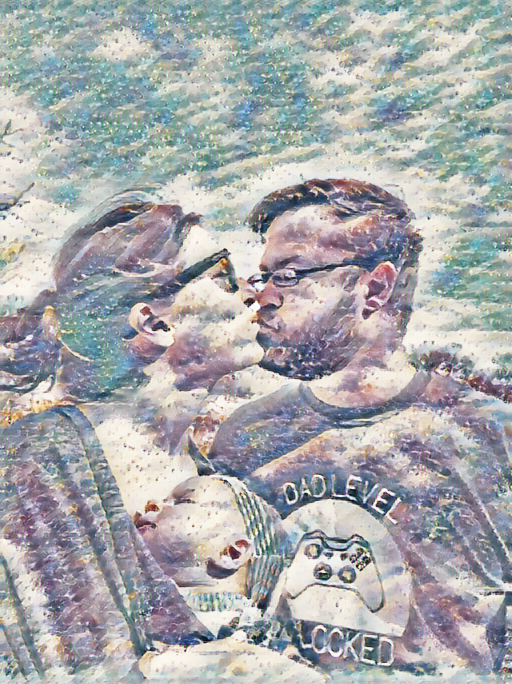

In [27]:
%time inference.eval_image(im, 15,2,1.0)

In [33]:
for i in range(0,16):
    out = inference.eval_image(im, i,2,1.0)
    imageio.imwrite('output_photos/'+str(i+1)+'.jpg', out)

In [31]:
device

device(type='cuda')